## Problem Statement
###  The purpose of this project is to develop a weather prediction system using the Naive Bayes algorithm. 
### The system will be designed to forecast the weather for a given day based on historical weather data.

## Reading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Reading in the dataset

In [9]:
df= pd.read_csv('seattle-weather.csv')

In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
df.shape

(1461, 6)

In [12]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


## Summary Statistics

In [17]:
print(df.describe().T.round(3))

                count    mean    std  min   25%   50%   75%   max
precipitation  1461.0   3.029  6.680  0.0   0.0   0.0   2.8  55.9
temp_max       1461.0  16.439  7.350 -1.6  10.6  15.6  22.2  35.6
temp_min       1461.0   8.235  5.023 -7.1   4.4   8.3  12.2  18.3
wind           1461.0   3.241  1.438  0.4   2.2   3.0   4.0   9.5


## Correlation

In [19]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


df.head()

In [21]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [24]:
df_copy=df.copy()

In [29]:
df.drop('date', axis=1, inplace=True)

In [30]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [33]:
df.drop('weather', axis=1, inplace=True)

In [34]:
df.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [35]:
corr = df.corr()

In [36]:
print(corr)

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


<Axes: >

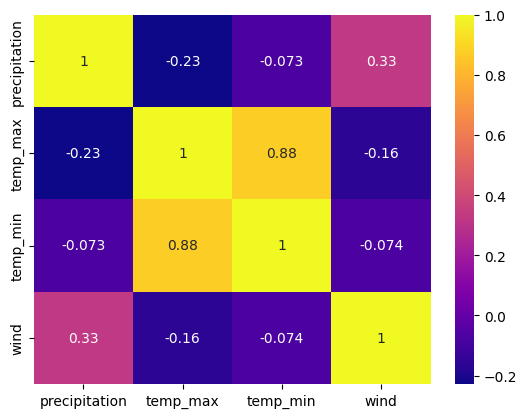

In [37]:
sns.heatmap(corr, annot=True,cbar=True,  cmap='plasma')

# Label Encoding

In [39]:
df=df_copy.copy()

In [40]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [41]:
df['weather'] = df['weather'].map({"rain":0,'sun':1,'fog':2,'drizzle':3,'snow':4})

In [42]:
df['weather'].value_counts()

weather
0    641
1    640
2    101
3     53
4     26
Name: count, dtype: int64

# Working on date colunm

In [43]:
df['date'].value_counts()

date
2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: count, Length: 1461, dtype: int64

In [44]:
df['date'] = pd.to_datetime(df['date'])
df['year'] =df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [46]:
df['date']

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

# train test split

In [47]:
X = df.drop(['date','weather'],axis=1)
y = df['weather']

In [48]:
X.shape

(1461, 7)

In [49]:
y.shape

(1461,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(1168, 7)

In [53]:
X_test.shape

(293, 7)

In [54]:
df.shape

(1461, 9)

In [56]:
X_train.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'year', 'month',
       'day'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

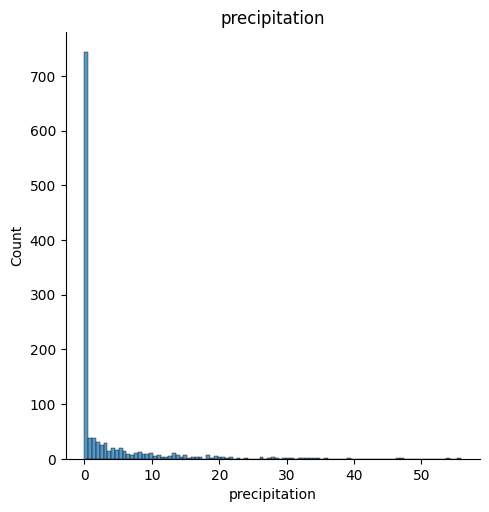

<Figure size 1000x600 with 0 Axes>

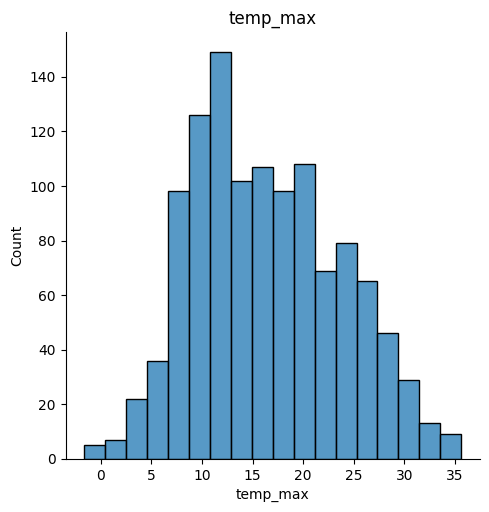

<Figure size 1000x600 with 0 Axes>

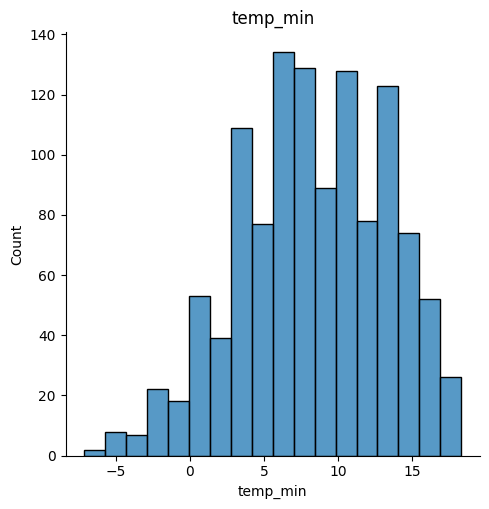

<Figure size 1000x600 with 0 Axes>

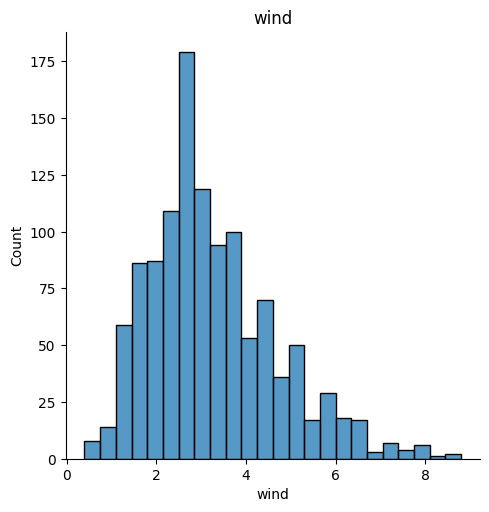

<Figure size 1000x600 with 0 Axes>

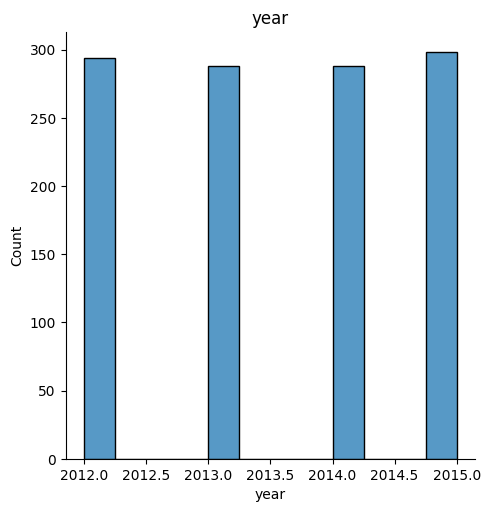

<Figure size 1000x600 with 0 Axes>

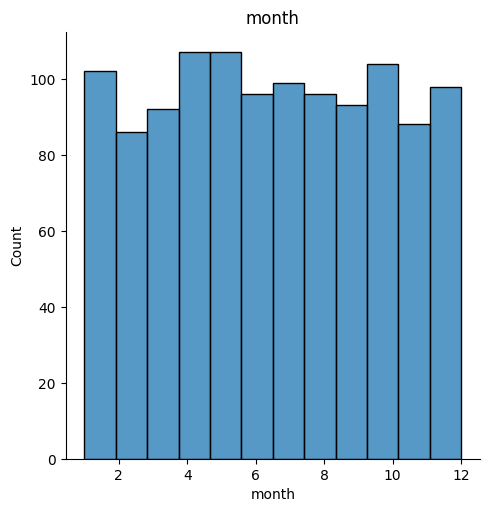

<Figure size 1000x600 with 0 Axes>

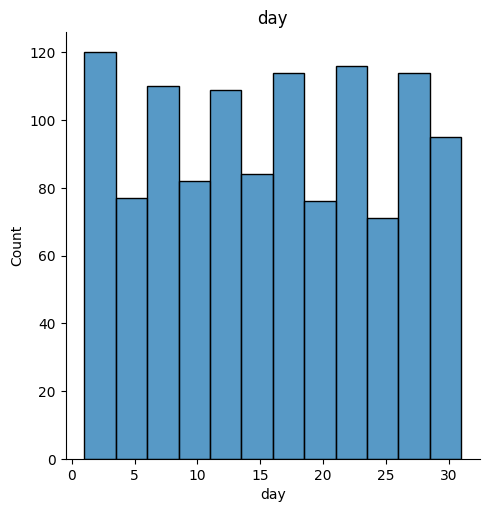

In [57]:
for col in X_train.columns:
    plt.figure(figsize=(10,6))
    sns.displot(X_train[col])
    plt.title(col)
    plt.show()
    

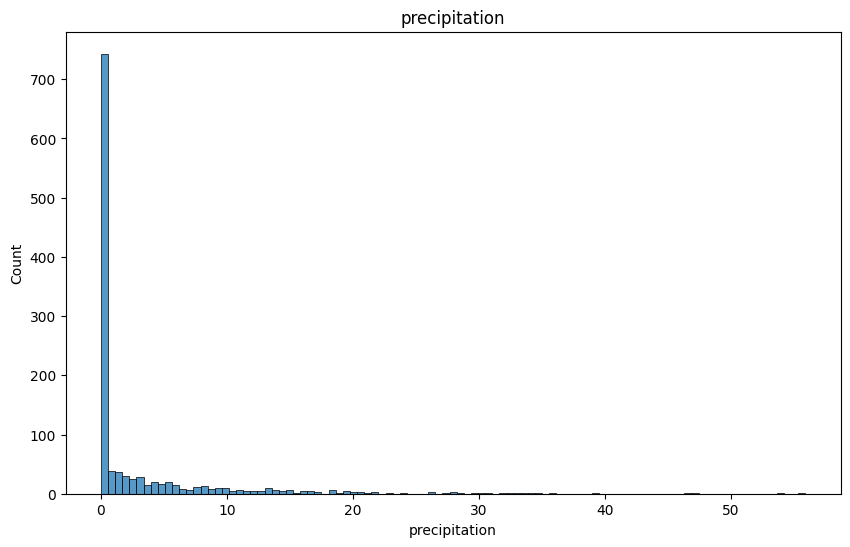

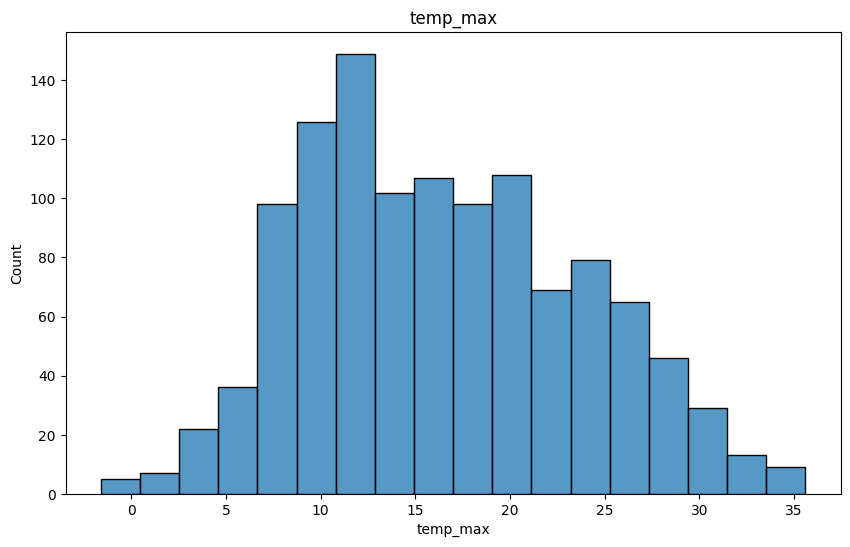

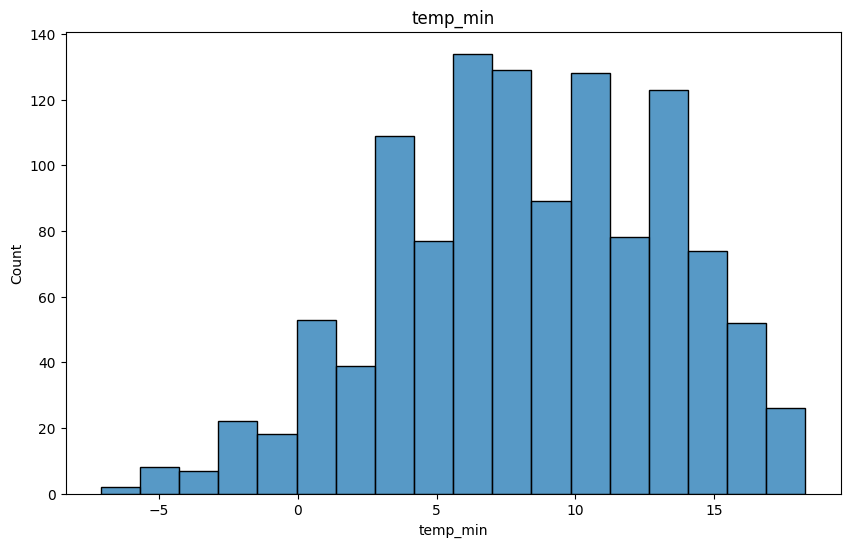

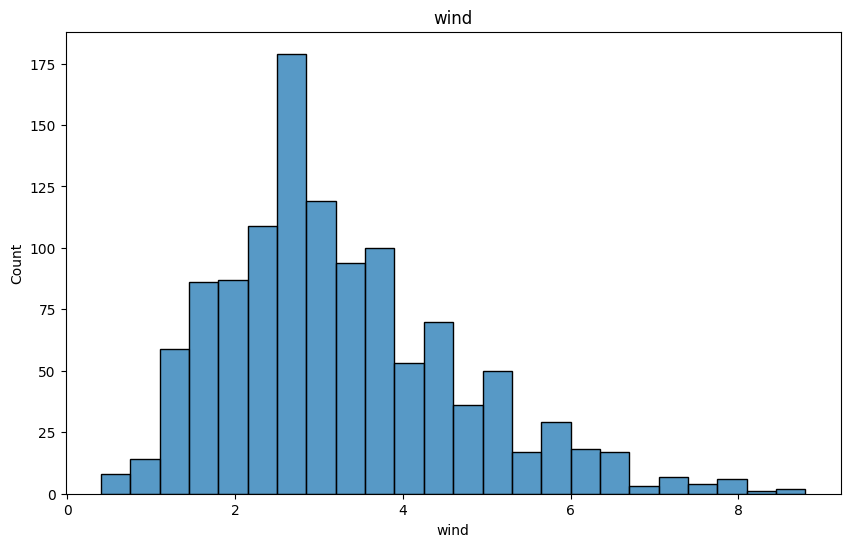

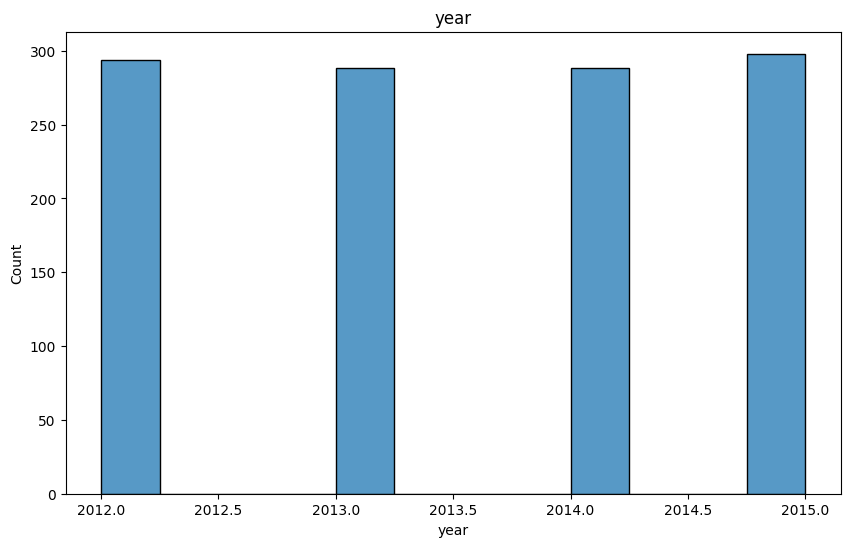

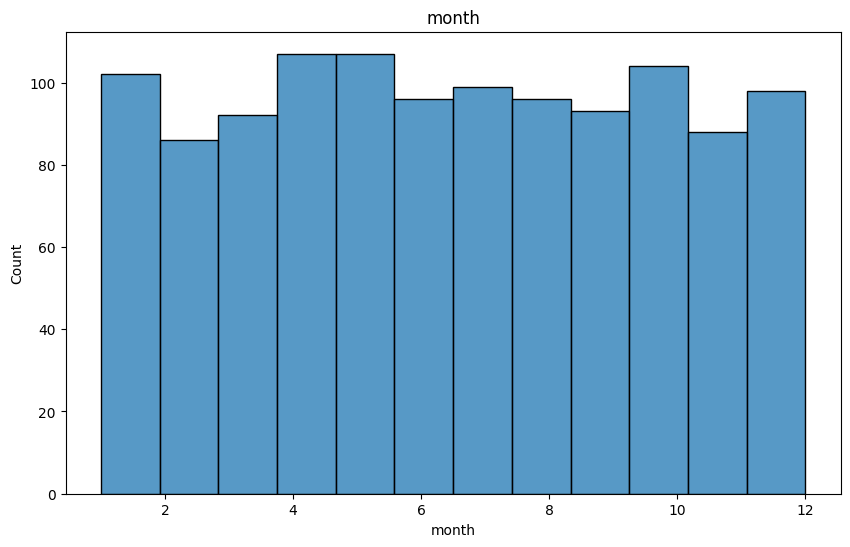

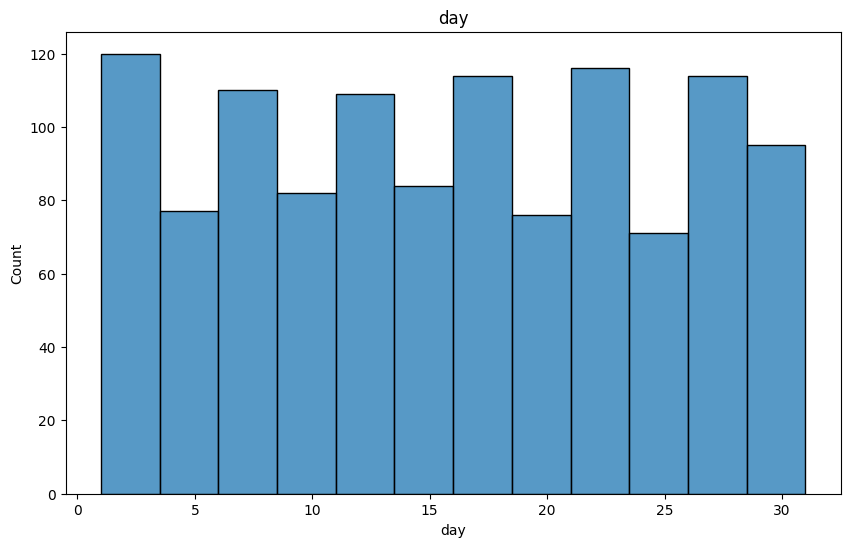

In [58]:
for col in X_train.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(X_train[col])
    plt.title(col)
    plt.show()
    

# Training models


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [61]:
models = {
    "lg": LogisticRegression(),
    "dtc": DecisionTreeClassifier(),
    "rfc": RandomForestClassifier(),
    "gbn": GaussianNB()
}

for name,mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    
    print(f"{name} with accuracy {accuracy_score(y_test,y_pred)}")

/home/sumaila/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lg with accuracy 0.7747440273037542
dtc with accuracy 0.764505119453925
rfc with accuracy 0.8464163822525598
gbn with accuracy 0.8430034129692833


# Selecting model

In [62]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

# Weather Predictive System

In [63]:
def weather_pred(precipitation,temp_max,temp_min,wind,year,month,day):
    features = np.array([[precipitation,temp_max,temp_min,wind,year,month,day]])
    prediction_out = gnb.predict(features).reshape(1,-1)
    
    return prediction_out[0]

In [66]:
precipitation = 1.5
temp_max = 12.2
temp_min = 9.4
wind = 3.8
year = 2015
month = 4
day = 11

result = weather_pred(precipitation,temp_max,temp_min,wind,year,month,day)
result

/home/sumaila/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [67]:
# 'rain':0,"sun":1,'fog':2,'drizzle':3,'snow':4
                    
if result == 0:
    print("its raining")
elif result == 1:
    print('its sunny')
elif result == 2:
    print('its foggy')
elif result == 3:
    print('its drizzle')
elif result == 4:
    print('its snowing')
    
else:
    print("there is some error")

its raining


In [68]:
raing: 1.5     12.2    6.7   3.8   2013   4  11

sunny:   0.0   21.7 13.3 3.2 2013 6 7

SyntaxError: invalid syntax (1717635174.py, line 1)

In [69]:
import pickle
pickle.dump(gnb,open('model.pkl','wb'))